In [136]:
# Dependencies
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
lodging = pd.read_csv('../Results/Lodging_Rating.csv')
del lodging['Unnamed: 0']
lodging.replace('NAN', value=0, inplace=True)
lodging = lodging.rename(columns={'lodging Total Count':'Total Count', 'Facility lodging':'Lodging Facility'})
lodging['Rating']=lodging['Rating'].astype(float)
lodging['Total Count']=lodging['Total Count'].astype(int)

# restaurant = restaurant.rename(columns={'Facility restaurant':'EatingOut Facility'})
# restaurant['Type']='Restaurant'
lodging.head()

,City Name,Lodging Facility,Latitude,Longitude,Rating,Site Name,Total Count
0,Northern Virginia Area,Fairbrook Hotels,38.96,-77.42,0.0,Center for Innovation Technology,1
1,Northern Virginia Area,BOQ Lodging,38.84,-77.05,5.0,Crystal City and Potomac Yard,2
2,Northern Virginia Area,Navy Lodge,38.84,-77.05,3.4,Crystal City and Potomac Yard,2
3,Washington DC,Navy Gateway Inns and Suites,38.86,-77.01,3.2,Nationals Park/ D.C United Stadium,1
4,Washington DC,Washington DC Accommodations,38.91,-77.02,0.0,Shaw-Howard University Area,1


In [138]:
new_lodging = lodging.groupby(['City Name', 'Site Name'])
lodging_count_df = pd.DataFrame(new_lodging['Site Name'].value_counts())
# lodging_count_df=lodging_count_df.reset_index()
lodging_count_df = lodging_count_df.rename(columns={'Site Name': 'Total Count'})
lodging_count_df=lodging_count_df.reset_index(level=1)
lodging_count_df = lodging_count_df.reset_index(level=0)
lodging_count_df = lodging_count_df.reset_index(drop=True)
lodging_count_df.head()

,City Name,Site Name,Total Count
0,Atlanta,Downtown Atlanta,2
1,Atlanta,Former GM plant,1
2,Atlanta,Midtown,3
3,Atlanta,The High Street Site,1
4,Austin,American-Statesman,2


In [270]:
lodging_count_final = lodging_count_df.groupby(['City Name'])
lodging_count_final_df = pd.DataFrame(lodging_count_final['Total Count'].sum())
lodging_count_final_df = lodging_count_final_df.sort_values(['Total Count'])[::-1]
lodging_count_final_df = lodging_count_final_df.reset_index()
lodging_count_final_df

,City Name,Total Count
0,Chicago,18
1,New York,8
2,Atlanta,7
3,Boston,5
4,Austin,4
5,Northern Virginia Area,3
6,Washington DC,2
7,Raleigh,2


{'Chicago': 1, 'New York': 2, 'Atlanta': 3, 'Boston': 4, 'Austin': 5, 'Northern Virginia Area': 6, 'Washington DC': 7, 'Raleigh': 8}


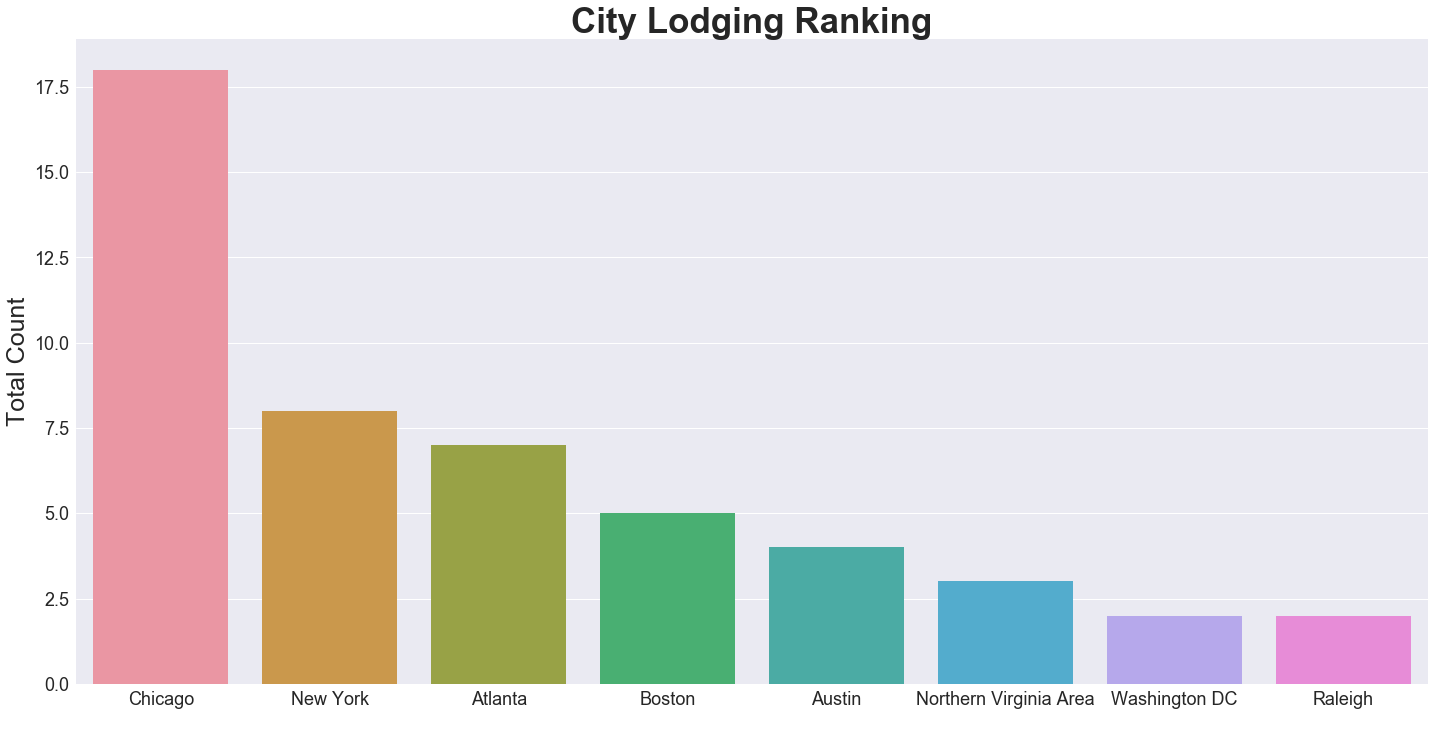

In [287]:
sns.factorplot(kind='bar',x='City Name',y='Total Count',data=lodging_count_final_df,
               size=10, aspect=2)
ranks_dict = {}
y=1
for name in lodging_count_final_df['City Name']:
    ranks_dict[name] = y
    y=y+1
print(ranks_dict)

plt.title('City Lodging Ranking', fontsize=35, fontweight='bold')

plt.xlabel(' ', fontsize=25)
plt.ylabel('Total Count', fontsize=25)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()